In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./stats/0.15.4.csv', skiprows=2)

In [4]:
df

,name,iterations,real_time,cpu_time,time_unit,bytes_per_second,items_per_second,label,error_occurred,error_message
0,xtensor_1D/3,25340023,2.660420e+01,2.644350e+01,ns,NaN,NaN,NaN,NaN,NaN
1,xtensor_1D/8,27367648,2.537890e+01,2.533450e+01,ns,NaN,NaN,NaN,NaN,NaN
2,xtensor_1D/64,20326658,3.434570e+01,3.429450e+01,ns,NaN,NaN,NaN,NaN,NaN
3,xtensor_1D/512,4144618,1.611380e+02,1.608860e+02,ns,NaN,NaN,NaN,NaN,NaN
4,xtensor_1D/1000,2922413,2.379350e+02,2.375760e+02,ns,NaN,NaN,NaN,NaN,NaN
5,xsimd_1D/3,46455832,1.483150e+01,1.481020e+01,ns,NaN,NaN,NaN,NaN,NaN
6,xsimd_1D/8,54203842,1.278930e+01,1.276960e+01,ns,NaN,NaN,NaN,NaN,NaN
7,xsimd_1D/64,33511962,2.070650e+01,2.067440e+01,ns,NaN,NaN,NaN,NaN,NaN
8,xsimd_1D/512,6097686,1.103050e+02,1.101400e+02,ns,NaN,NaN,NaN,NaN,NaN
9,xsimd_1D/1000,3772913,1.827480e+02,1.824780e+02,ns,NaN,NaN,NaN,NaN,NaN


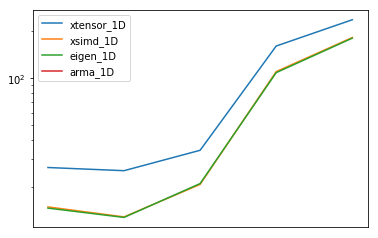

In [5]:
def plot(prefix, df=df, label='', log=True):
    dt = df[df.name.str.match(f'({prefix}.*)')].real_time.as_matrix()
    xdt = np.arange(dt.shape[0])
    plt.xticks(xdt, [el.split('/')[1] for el in df[df.name.str.match('(xtensor_1D.*)')].name])
    if len(label):
        label = " " + label
    if log:
        plt.semilogy(xdt, dt, label=prefix + label)
    else:
        plt.plot(xdt, dt, label=prefix + label)
    plt.legend()
plot('xtensor_1D')
plot('xsimd_1D')
plot('eigen_1D')
plot('arma_1D')

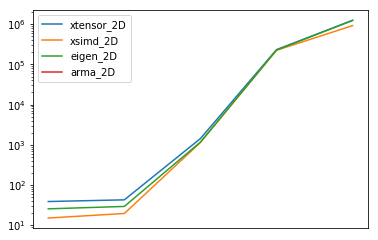

In [6]:
plot('xtensor_2D')
plot('xsimd_2D')
plot('eigen_2D')
plot('arma_2D')

In [7]:
df2 = pd.read_csv('./stats/0.15.4.csv', skiprows=2)
df1 = pd.read_csv('./stats/0.14.0.csv', skiprows=2)

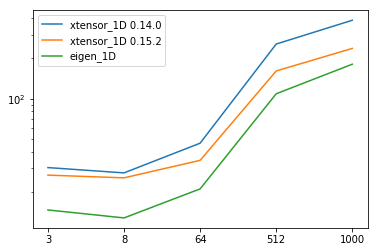

In [8]:
plot('xtensor_1D', df1, '0.14.0')
plot('xtensor_1D', df2, '0.15.2')
plot('eigen_1D', df2)

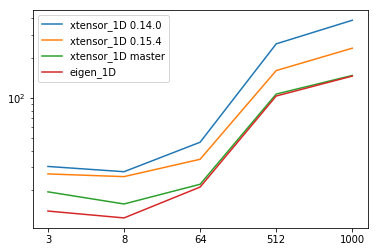

In [17]:
df2 = pd.read_csv('./stats/0.15.4.csv', skiprows=2)
df1 = pd.read_csv('./stats/0.14.0.csv', skiprows=2)
df3 = pd.read_csv('./stats/master.csv', skiprows=2)
log = True
plot('xtensor_1D', df1, '0.14.0', log)
plot('xtensor_1D', df2, '0.15.4', log)
plot('xtensor_1D', df3, 'master', log)
plot('eigen_1D', df3, '', log)